## `Team members:` 
- **Arwa Essam**
- **Rahma Abdelkader**
- **Yousr Ashraf**

## `Columns Details:` 
- **ID**
- **Raduis**
- **Texture**:
- **Perimeter**
- **Area**
- **Smoothness**
- **diagnosis_result**
- **Symmetry**
- **Fractal dimension**

## `Steps to follow:`
- 1- **Identifying the problem**
- 2- **Data preparing/preprocessing (if needed)**
- 3- **EDA for more data understanding**
- 4- **KNN and raduis neighbour using SKlearn**
- 5- **KNN and raduis neighbour from scratch**
- 6- **modeling evaluation**

## `First: identifying problem`
- The main problem that we aim to predict whether this patient has a maligne or benigne tumor 
based on some features related to tumor

In [1]:
# importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/DELL/Downloads/Prostate_Cancer.csv") 
data

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


## `Second: Data preparing/preprocessing (if needed) `

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
data.shape

(100, 10)

In [5]:
# checking any missing values
data.isna().any()

id                   False
diagnosis_result     False
radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
symmetry             False
fractal_dimension    False
dtype: bool

In [6]:
# since no missing values needed, let's check the duplication
data.duplicated().sum()

0

In [7]:
#Great! no duplication or any missing values so let us move on 

In [8]:
# Statsical information for numerical features
round(data.describe(include="number"))

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,50.0,17.0,18.0,97.0,703.0,0.0,0.0,0.0,0.0
std,29.0,5.0,5.0,24.0,320.0,0.0,0.0,0.0,0.0
min,1.0,9.0,11.0,52.0,202.0,0.0,0.0,0.0,0.0
25%,26.0,12.0,14.0,82.0,477.0,0.0,0.0,0.0,0.0
50%,50.0,17.0,18.0,94.0,644.0,0.0,0.0,0.0,0.0
75%,75.0,21.0,22.0,114.0,917.0,0.0,0.0,0.0,0.0
max,100.0,25.0,27.0,172.0,1878.0,0.0,0.0,0.0,0.0


In [9]:
# Statsical information for categoral (non-numeric) features
round(data.describe(exclude="number"))

,diagnosis_result
count,100
unique,2
top,M
freq,62


### observation
- It seems that all the features are numerical except for the target

In [10]:
# let us drop the id column since we needn't in our task.
data.drop(['id'],axis=1,inplace=True)
data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


## `Third: EDA`

In [11]:
results = data["diagnosis_result"].value_counts()
results

M    62
B    38
Name: diagnosis_result, dtype: int64

In [12]:
# For better understanding let's replace M and B with malignant and benign
data["diagnosis_result"] = data["diagnosis_result"].replace({'M': 'Malignant', 'B': 'Benign'})

In [13]:
results = data["diagnosis_result"].value_counts()
results

Malignant    62
Benign       38
Name: diagnosis_result, dtype: int64

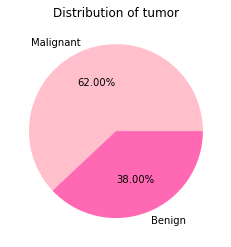

In [14]:
colors = ['#FFC0CB', '#FF69B4']
plt.pie(labels=results.index,x=results.values, colors=colors,autopct = '%.2f%%')
plt.title("Distribution of tumor")
plt.show()

### observation
- The distribution of malignant tumors in our dataset is more than benign.

### Symmetry

In [15]:
values = data["symmetry"].value_counts()
values

0.172    5
0.190    4
0.181    3
0.195    3
0.193    3
        ..
0.157    1
0.178    1
0.231    1
0.175    1
0.188    1
Name: symmetry, Length: 64, dtype: int64

In [16]:
data["symmetry"].mean()

0.19317

In [17]:
# We can't benifit from a values like this,so..
# what about creating another feature by classifying this wide range of values for symmetry

In [18]:
bins = [float('-inf'), 0.15, 0.20, float('inf')]
labels = ['mild_symmetry', 'moderate_symmetry', 'high_symmetry']

# Create a new column 'symmetry_category' based on the cut
data['symmetry_category'] = pd.cut(data['symmetry'],bins=bins,labels=labels)

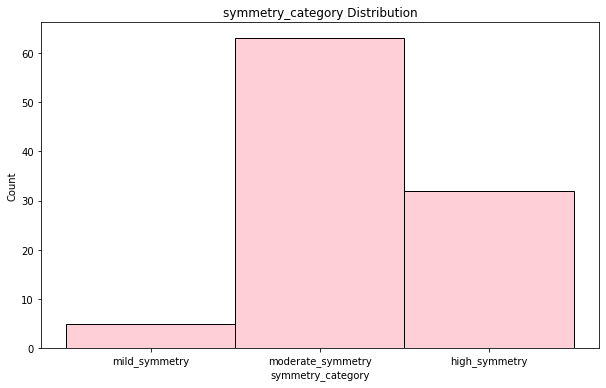

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="symmetry_category",binwidth=5, color="pink")
plt.title("symmetry_category Distribution")
plt.show()

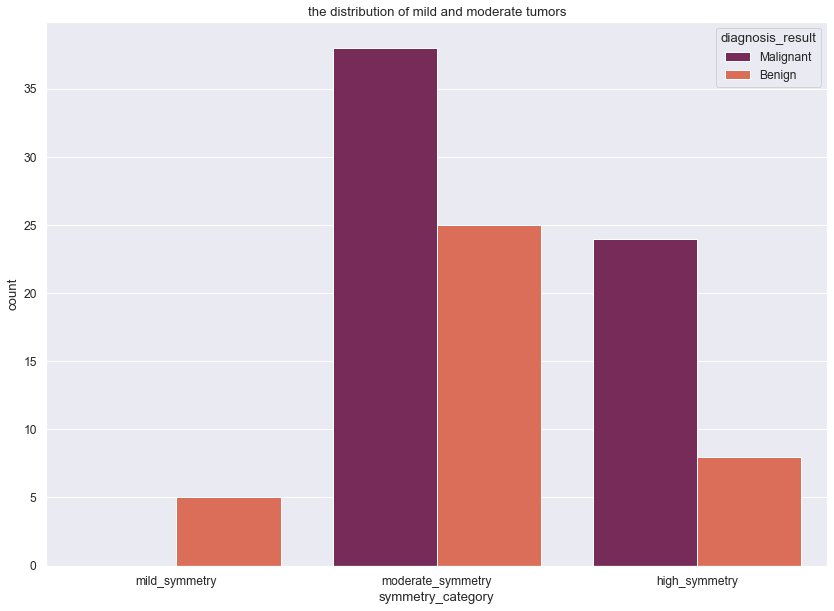

In [20]:
plt.figure(figsize=(14,10))
sns.set_theme(style="darkgrid", font_scale = 1.1)
g =sns.countplot(data=data, x='symmetry_category', hue='diagnosis_result', palette='rocket').set_title('the distribution of mild and moderate tumors')

### observation
- The distribution of moderate symmetry tumors is the highest.
- It seems that the mild symmetry ones are always benign while most of the moderate and high are malignant.

### Compactness

In [21]:
data.columns

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension',
       'symmetry_category'],
      dtype='object')

In [22]:
data["compactness"].value_counts()

0.105    3
0.126    2
0.134    2
0.127    2
0.081    2
        ..
0.150    1
0.152    1
0.189    1
0.116    1
0.114    1
Name: compactness, Length: 85, dtype: int64

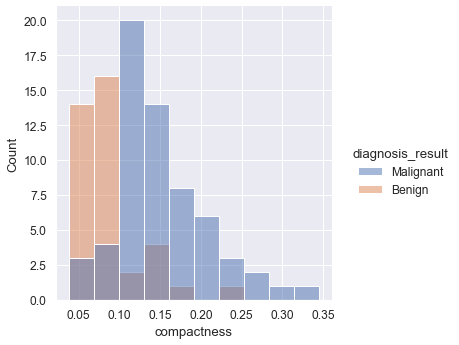

In [23]:
sns.displot(data, x = "compactness", hue='diagnosis_result')

In [24]:
data["compactness"].mean()

0.1267

In [25]:
bins = [float('-inf'), 0.10, 0.20, float('inf')]
labels = ['low_compact', 'moderate_compact', 'high_compact']

# Create a new column 'symmetry_category' based on the cut
data['compactness_category'] = pd.cut(data['compactness'], bins=bins, labels=labels)

In [26]:
data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,symmetry_category,compactness_category
0,Malignant,23,12,151,954,0.143,0.278,0.242,0.079,high_symmetry,high_compact
1,Benign,9,13,133,1326,0.143,0.079,0.181,0.057,moderate_symmetry,low_compact
2,Malignant,21,27,130,1203,0.125,0.160,0.207,0.060,high_symmetry,moderate_compact
3,Malignant,14,16,78,386,0.070,0.284,0.260,0.097,high_symmetry,high_compact
4,Malignant,9,19,135,1297,0.141,0.133,0.181,0.059,moderate_symmetry,moderate_compact
...,...,...,...,...,...,...,...,...,...,...,...
95,Malignant,23,16,132,1264,0.091,0.131,0.210,0.056,high_symmetry,moderate_compact
96,Benign,22,14,78,451,0.105,0.071,0.190,0.066,moderate_symmetry,low_compact
97,Benign,19,27,62,295,0.102,0.053,0.135,0.069,mild_symmetry,low_compact
98,Benign,21,24,74,413,0.090,0.075,0.162,0.066,moderate_symmetry,low_compact


In [27]:
data['compactness_category'] = data['compactness_category'].astype('object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   diagnosis_result      100 non-null    object  
 1   radius                100 non-null    int64   
 2   texture               100 non-null    int64   
 3   perimeter             100 non-null    int64   
 4   area                  100 non-null    int64   
 5   smoothness            100 non-null    float64 
 6   compactness           100 non-null    float64 
 7   symmetry              100 non-null    float64 
 8   fractal_dimension     100 non-null    float64 
 9   symmetry_category     100 non-null    category
 10  compactness_category  100 non-null    object  
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 8.2+ KB


Text(0.5, 1.0, 'the distribution of mild and moderate tumors')

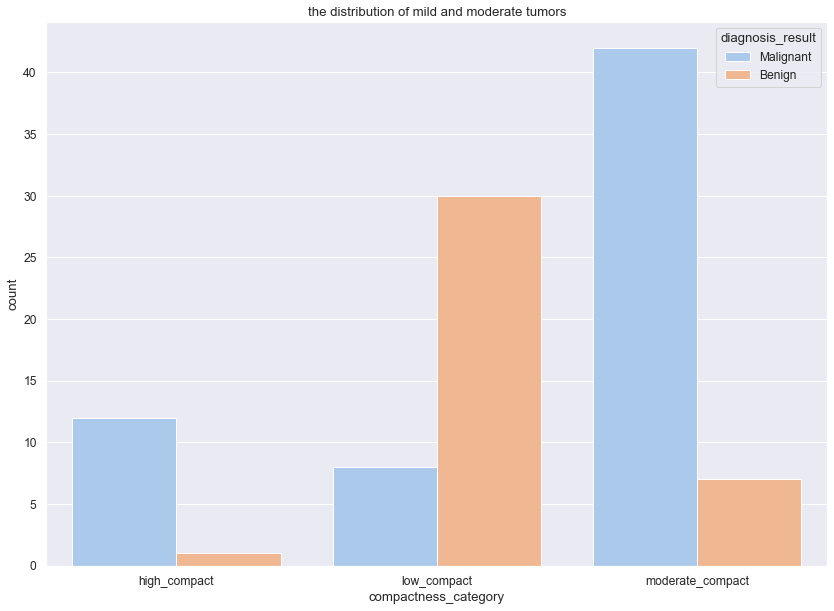

In [29]:
plt.figure(figsize=(14,10))
# sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=data, x='compactness_category', hue='diagnosis_result', palette='pastel').set_title('the distribution of mild and moderate tumors')

In [30]:
# we don't need this feature anymore let's get rid of it
data.drop(['symmetry'],axis=1,inplace=True)
data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,fractal_dimension,symmetry_category,compactness_category
0,Malignant,23,12,151,954,0.143,0.278,0.079,high_symmetry,high_compact
1,Benign,9,13,133,1326,0.143,0.079,0.057,moderate_symmetry,low_compact
2,Malignant,21,27,130,1203,0.125,0.160,0.060,high_symmetry,moderate_compact
3,Malignant,14,16,78,386,0.070,0.284,0.097,high_symmetry,high_compact
4,Malignant,9,19,135,1297,0.141,0.133,0.059,moderate_symmetry,moderate_compact
...,...,...,...,...,...,...,...,...,...,...
95,Malignant,23,16,132,1264,0.091,0.131,0.056,high_symmetry,moderate_compact
96,Benign,22,14,78,451,0.105,0.071,0.066,moderate_symmetry,low_compact
97,Benign,19,27,62,295,0.102,0.053,0.069,mild_symmetry,low_compact
98,Benign,21,24,74,413,0.090,0.075,0.066,moderate_symmetry,low_compact


<AxesSubplot:>

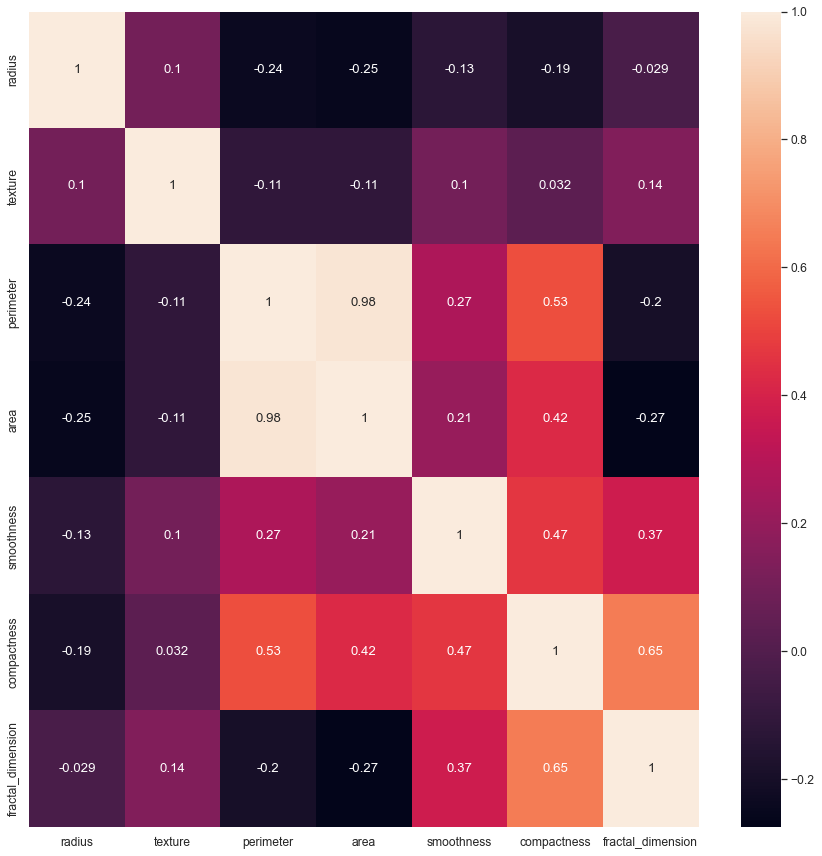

In [31]:
#let's check the correlation of data
plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True)

### The 3 most correlated are:
- perimeter
- area
- compactness

<AxesSubplot:xlabel='perimeter', ylabel='Density'>

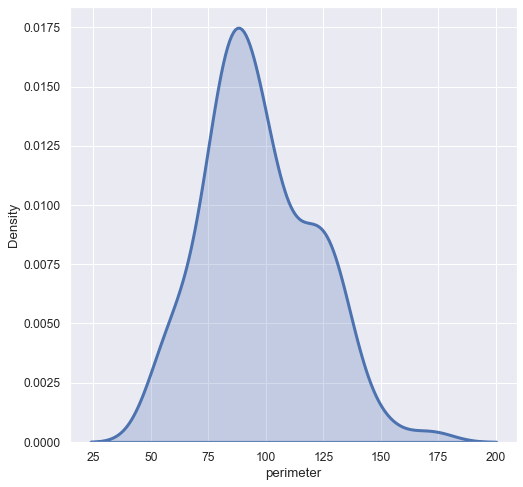

In [32]:
plt.figure(figsize=(8,8))
sns.distplot(data['perimeter'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

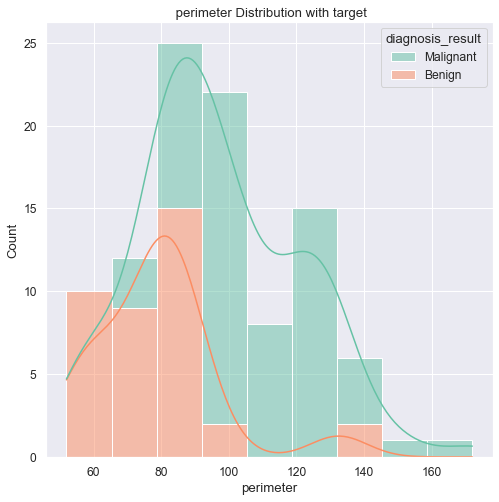

In [33]:
plt.figure(figsize=(8, 8))
plt.title(" perimeter Distribution with target")
sns.histplot(data=data, x='perimeter', kde=True, hue='diagnosis_result', multiple='stack', palette='Set2')
plt.show()


### observation
- It seems that the distribution is left-skewed which means most of the tumors' perimeters are located between 80-100
- The probability of the tumor to be benign increases as we go down the perimeter (less than 100)

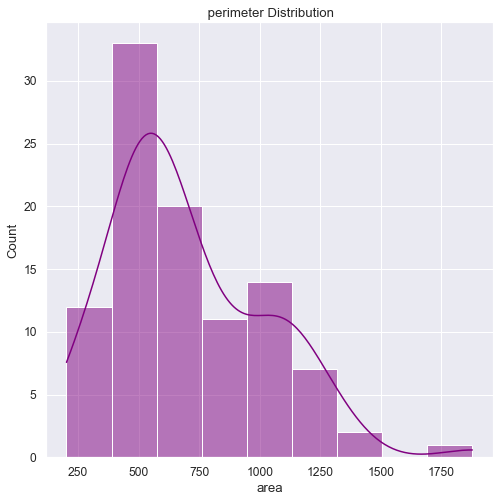

In [34]:
plt.figure(figsize=(8,8))
plt.title(" perimeter Distribution")
sns.histplot(data=data, x='area', kde=True, color = 'purple')
plt.show()

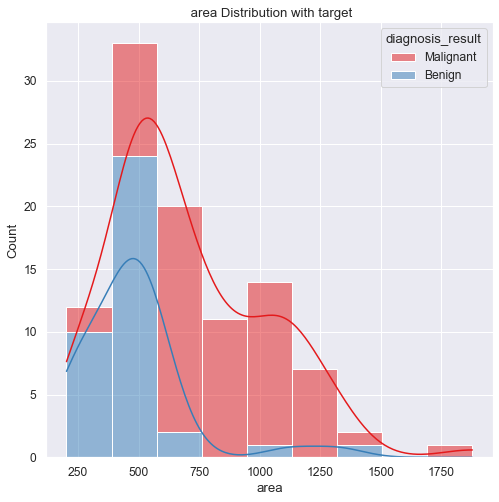

In [35]:
plt.figure(figsize=(8, 8))
plt.title(" area Distribution with target")
sns.histplot(data=data, x='area', kde=True, hue='diagnosis_result', multiple='stack', palette='Set1')
plt.show()


### observation
- It seems that the distribution of area declares that the benign probability increaes as the area decreases down 750.

<AxesSubplot:xlabel='compactness', ylabel='Density'>

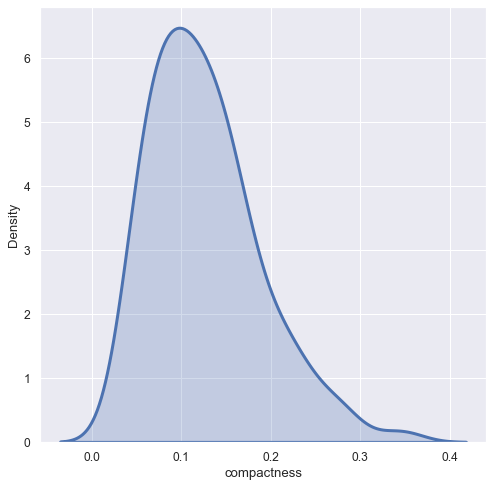

In [36]:
plt.figure(figsize=(8,8))
sns.distplot(data['compactness'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

### observation
- It seems that the comapctness distribution is left-skewed and the peak is found at 0.1.

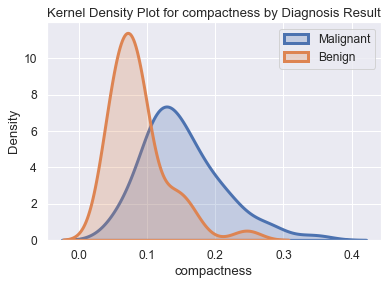

In [37]:
# Create a kernel density plot with different shades for the two classes
sns.distplot(data[data['diagnosis_result'] == 'Malignant']['compactness'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='Malignant')
sns.distplot(data[data['diagnosis_result'] == 'Benign']['compactness'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='Benign')

plt.title('Kernel Density Plot for compactness by Diagnosis Result')
plt.xlabel('compactness')
plt.ylabel('Density')
plt.legend()
plt.show()

### observation
- Higher benign probability found less than compactness of 0.1 while probability of malignant increases between 0.1 and 0.2

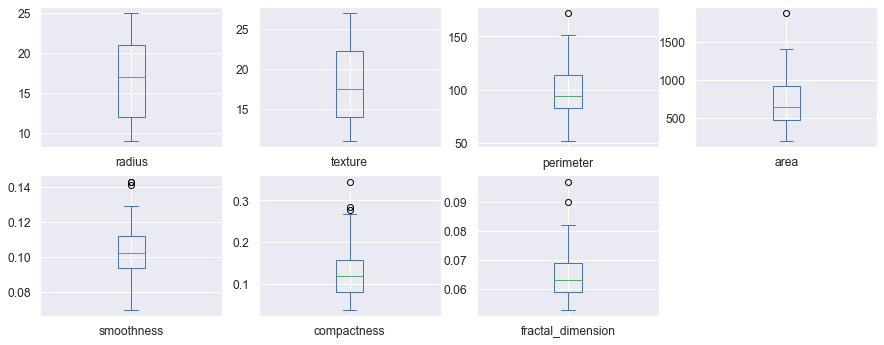

In [38]:
# showing outliers
data.plot(kind = "box" , subplots = True , layout= (5,4), figsize =(15,15) )
plt.show()

In [39]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    not_outliers = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~not_outliers).sum()} points")
    return not_outliers

In [40]:
def interquartile(col):
    index = []
    outliers = []
    quantile1, quantile3 = np.percentile(col,[25,75])
    iqr_value = quantile3 - quantile1
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value) 
    print(f"The lower Bound {lower_bound_val} and the upper bound {upper_bound_val}")
    for i in range(len(col)):
        if col[i] < lower_bound_val or col[i] > upper_bound_val :
            index.append(i)
            outliers.append(col[i])
    return outliers, index

### Perimeter

z-score of 2 corresponds to a prob of 0.27%
Rejection 3 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 1 points


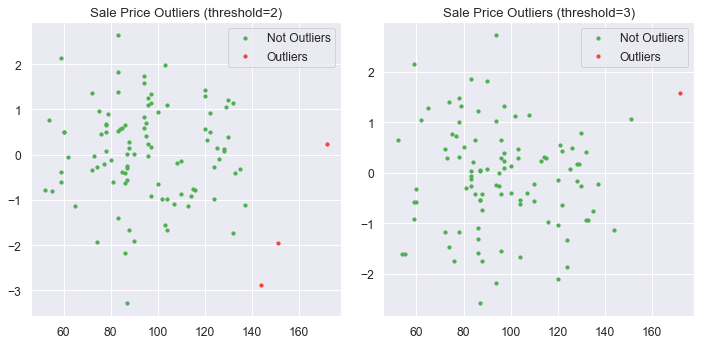

In [41]:
plt.figure(figsize=(10, 5))

for i, threshold in zip(range(1, 3), range(2, 4)):
    plt.subplot(1, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    not_outliers = z_score(data['perimeter'], threshold=threshold)
    plt.scatter(data['perimeter'][not_outliers], visual_scatter[not_outliers], s=10, label="Not Outliers", color="#4CAF50")
    plt.scatter(data['perimeter'][~not_outliers], visual_scatter[~not_outliers], s=10, label="Outliers", color="#F44336")
    plt.legend()
    plt.title(f"Sale Price Outliers (threshold={threshold})")

plt.tight_layout()

In [42]:
perimeter_outliers, perimeter_outliers_index = interquartile(data['perimeter'])
perimeter_outliers_index

The lower Bound 34.875 and the upper bound 161.875


[82]

In [43]:
mean = np.mean(data['perimeter'])
data.loc[perimeter_outliers_index[0], 'perimeter'] = mean

# Area

z-score of 2 corresponds to a prob of 0.27%
Rejection 2 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 1 points


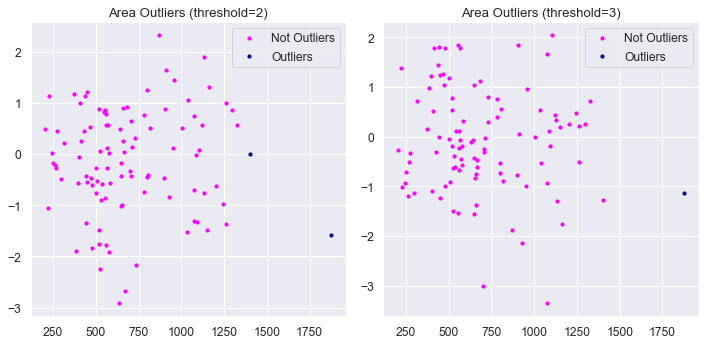

In [44]:
plt.figure(figsize=(10, 5))

for i, threshold in zip(range(1, 3), range(2, 4)):
    plt.subplot(1, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    not_outliers = z_score(data['area'], threshold=threshold)
    plt.scatter(data['area'][not_outliers], visual_scatter[not_outliers], s=10, label="Not Outliers", color="#FF00FF")
    plt.scatter(data['area'][~not_outliers], visual_scatter[~not_outliers], s=10, label="Outliers", color="#00008B")
    plt.legend()
    plt.title(f"Area Outliers (threshold={threshold})")

plt.tight_layout()

In [45]:
area_outliers, area_outliers_index = interquartile(data['area'])
print(area_outliers)
mean = np.mean(data['area'])
data.loc[area_outliers_index[0], 'area'] = mean

The lower Bound -183.625 and the upper bound 1577.375
[1878]


### Smoothness

z-score of 2 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points


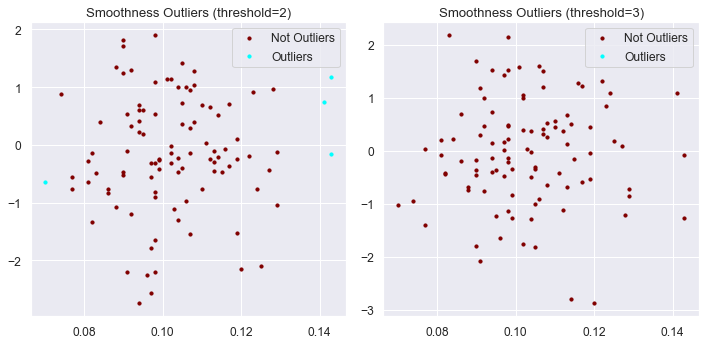

In [46]:
plt.figure(figsize=(10, 5))

for i, threshold in zip(range(1, 3), range(2, 4)):
    plt.subplot(1, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    not_outliers = z_score(data['smoothness'], threshold=threshold)
    plt.scatter(data['smoothness'][not_outliers], visual_scatter[not_outliers], s=10, label="Not Outliers", color="#800000")
    plt.scatter(data['smoothness'][~not_outliers], visual_scatter[~not_outliers], s=10, label="Outliers", color="#00FFFF")
    plt.legend()
    plt.title(f"Smoothness Outliers (threshold={threshold})")

plt.tight_layout()

In [47]:
smoothness_outliers, smoothness_outliers_index = interquartile(data['smoothness'])
print(smoothness_outliers)
mean = np.mean(data['smoothness'])
for i in smoothness_outliers_index:
    data.loc[i, 'smoothness'] = mean

The lower Bound 0.06575 and the upper bound 0.13975
[0.143, 0.143, 0.141]


In [48]:
data


,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,fractal_dimension,symmetry_category,compactness_category
0,Malignant,23,12,151.0,954.0,0.10273,0.278,0.079,high_symmetry,high_compact
1,Benign,9,13,133.0,1326.0,0.10273,0.079,0.057,moderate_symmetry,low_compact
2,Malignant,21,27,130.0,1203.0,0.12500,0.160,0.060,high_symmetry,moderate_compact
3,Malignant,14,16,78.0,386.0,0.07000,0.284,0.097,high_symmetry,high_compact
4,Malignant,9,19,135.0,1297.0,0.10273,0.133,0.059,moderate_symmetry,moderate_compact
...,...,...,...,...,...,...,...,...,...,...
95,Malignant,23,16,132.0,1264.0,0.09100,0.131,0.056,high_symmetry,moderate_compact
96,Benign,22,14,78.0,451.0,0.10500,0.071,0.066,moderate_symmetry,low_compact
97,Benign,19,27,62.0,295.0,0.10200,0.053,0.069,mild_symmetry,low_compact
98,Benign,21,24,74.0,413.0,0.09000,0.075,0.066,moderate_symmetry,low_compact


### Compactness

z-score of 2 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 1 points


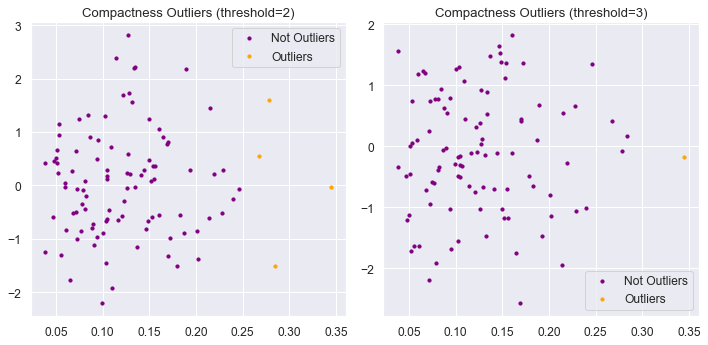

In [49]:
plt.figure(figsize=(10, 5))

for i, threshold in zip(range(1, 3), range(2, 4)):
    plt.subplot(1, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    not_outliers = z_score(data['compactness'], threshold=threshold)
    plt.scatter(data['compactness'][not_outliers], visual_scatter[not_outliers], s=10, label="Not Outliers", color="#800080")
    plt.scatter(data['compactness'][~not_outliers], visual_scatter[~not_outliers], s=10, label="Outliers", color="#FFA500")
    plt.legend()
    plt.title(f"Compactness Outliers (threshold={threshold})")

plt.tight_layout()

In [50]:
compactness_outliers, compactness_outliers_index = interquartile(data['compactness'])
print(compactness_outliers)
mean = np.mean(data['compactness'])
for i in compactness_outliers_index:
    data.loc[i, 'compactness'] = mean

The lower Bound -0.03424999999999999 and the upper bound 0.27175
[0.278, 0.284, 0.345]


### Fractal dimension

z-score of 2 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 2 points


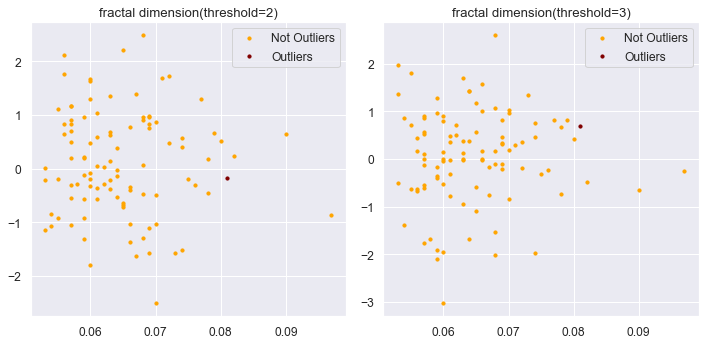

In [51]:
plt.figure(figsize=(10, 5))

for i, threshold in zip(range(1, 3), range(2, 4)):
    plt.subplot(1, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    not_outliers_fractal_dimension = z_score(data['fractal_dimension'], threshold=threshold)
    plt.scatter(data['fractal_dimension'][not_outliers], visual_scatter[not_outliers], s=10, label="Not Outliers", color="#FFA500")
    plt.scatter(data['fractal_dimension'][~not_outliers], visual_scatter[~not_outliers], s=10, label="Outliers", color="#800000")
    plt.legend()
    plt.title(f"fractal dimension(threshold={threshold})")

plt.tight_layout()

In [52]:
fractal_dimension_outliers, fractal_dimension_outliers_index = interquartile(data['fractal_dimension'])
print(fractal_dimension_outliers)
mean = np.mean(data['fractal_dimension'])
for i in fractal_dimension_outliers_index:
    data.loc[i, 'fractal_dimension'] = mean

The lower Bound 0.043999999999999984 and the upper bound 0.08400000000000002
[0.097, 0.09]


## `Summary:` 
**Data preparation** 
  - No missing values.
  - no duplications found.
  - id columns is dropped.
  - we created symmetry_category and removed symmetry.
  - Highest outliers exsist in Fractal dimension, so remove it
    
    
**EDA**
  - The distribution of malignant tumors in our dataset is more than benign.
  - The distribution of moderate symmetry tumors is the highest.
  - It seems that the mild symmetry ones are always benign while most of the moderate and high are malignant.
  - perimeter,area and compactness are highly correlated.
  - It seems that the distribution is left-skewed which means most of the tumors' perimeters are located between 80-100.
  - The probability of the tumor to be benign increases as we go down the perimeter (less than 100).
  - It seems that the distribution of area declares that the benign probability increaes as the area decreases down 750.
  - It seems that the comapctness distribution is left-skewed and the peak is found at 0.1.
  
  

## Encoding the Categorical data

In [53]:
# Change the categorical data to numerical data
def Encoding(data):
    # create the encoder variable
    le_encoder = LabelEncoder()
    # Extract the categoral data
    cat_df = data.select_dtypes(include=['object','category'])
    # Encode the categorecal data
    for i in cat_df:
        data[i] = le_encoder.fit_transform(data[i])
    return data

In [54]:
encoded_data = Encoding(data)
encoded_data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,fractal_dimension,symmetry_category,compactness_category
0,1,23,12,151.0,954.0,0.10273,0.1267,0.07900,0,0
1,0,9,13,133.0,1326.0,0.10273,0.0790,0.05700,2,1
2,1,21,27,130.0,1203.0,0.12500,0.1600,0.06000,0,2
3,1,14,16,78.0,386.0,0.07000,0.1267,0.06469,0,0
4,1,9,19,135.0,1297.0,0.10273,0.1330,0.05900,2,2
...,...,...,...,...,...,...,...,...,...,...
95,1,23,16,132.0,1264.0,0.09100,0.1310,0.05600,0,2
96,0,22,14,78.0,451.0,0.10500,0.0710,0.06600,2,1
97,0,19,27,62.0,295.0,0.10200,0.0530,0.06900,1,1
98,0,21,24,74.0,413.0,0.09000,0.0750,0.06600,2,1


### Spliting data

In [55]:
x = data.drop(['diagnosis_result','compactness'] , axis = 1).values
y = data['diagnosis_result'].values

In [56]:
# splitting the data after scaling
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=5, test_size = 0.35)

### Scalling data

In [57]:
sc = StandardScaler()

# Fit and transform the training data
x_train_sc = sc.fit_transform(x_train)

# Transform the testing data
x_test_sc = sc.transform(x_test)

In [58]:
  def cmatrix_scratch(cm,model_name,color):
    # check the confusion matrix

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=color)

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])


In [59]:
def calculate_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total


def calculate_precision(y_true, y_pred, positive_class=1):
    true_positive = np.sum((y_true == positive_class) & (y_pred == positive_class))
    false_positive = np.sum((y_true != positive_class) & (y_pred == positive_class))
    return true_positive / (true_positive + false_positive)



def calculate_recall(y_true, y_pred, positive_class=1):
    true_positive = np.sum((y_true == positive_class) & (y_pred == positive_class))
    false_negative = np.sum((y_true == positive_class) & (y_pred != positive_class))
    return true_positive / (true_positive + false_negative)


def calculate_f1_score(y_true, y_pred, positive_class=1):
    precision_val = calculate_precision(y_true, y_pred, positive_class)
    recall_val = calculate_recall(y_true, y_pred, positive_class)
    return 2 * (precision_val * recall_val) / (precision_val + recall_val)


def Implement_confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(np.concatenate([y_true, y_pred]))
    num_classes = len(unique_classes)
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(num_classes):
        for j in range(num_classes):
            cm[i, j] = np.sum((y_true == unique_classes[i]) & (y_pred == unique_classes[j]))

    return cm


def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### KNN from scratch implementation

In [60]:
# Measuring ecludian distance between two points
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [61]:
 #Function to calculate KNN
def knn_predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [62]:
k_values = range(1, 25)
for k in k_values:
    y_pred = knn_predict(x_train,y_train,x_test , k)
    acc = round(calculate_accuracy(y_test, y_pred)*100, 2)
    print(f"At k = {k}, the accuracy = {acc}")

At k = 1, the accuracy = 80.0
At k = 2, the accuracy = 80.0
At k = 3, the accuracy = 88.57
At k = 4, the accuracy = 85.71
At k = 5, the accuracy = 82.86
At k = 6, the accuracy = 88.57
At k = 7, the accuracy = 82.86
At k = 8, the accuracy = 88.57
At k = 9, the accuracy = 88.57
At k = 10, the accuracy = 88.57
At k = 11, the accuracy = 88.57
At k = 12, the accuracy = 88.57
At k = 13, the accuracy = 88.57
At k = 14, the accuracy = 88.57
At k = 15, the accuracy = 88.57
At k = 16, the accuracy = 88.57
At k = 17, the accuracy = 88.57
At k = 18, the accuracy = 88.57
At k = 19, the accuracy = 91.43
At k = 20, the accuracy = 91.43
At k = 21, the accuracy = 94.29
At k = 22, the accuracy = 94.29
At k = 23, the accuracy = 94.29
At k = 24, the accuracy = 94.29


In [63]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [64]:
y_pred = knn_predict(x_train,y_train,x_test , 9)


In [65]:
y_pred_sc = knn_predict(x_train_sc,y_train,x_test_sc , 4)


### With scaling

In [66]:
y_pred_sc_array=np.array(y_pred_sc)

acc_scalled_scratch = calculate_accuracy(y_test, y_pred_sc_array)
prec_scalled_scratch = calculate_precision(y_test, y_pred_sc_array)
rec_scalled_scratch = calculate_recall(y_test, y_pred_sc_array)
f1_scalled_scratch = calculate_f1_score(y_test, y_pred_sc_array)

print(f'The Accuracy: {acc_scalled_scratch * 100:.2f}')
print(f'The Precision: {prec_scalled_scratch:.2f}')
print(f'The Recall: {rec_scalled_scratch:.2f}')
print(f'The F1 Score: {f1_scalled_scratch:.2f}')

The Accuracy: 85.71
The Precision: 0.90
The Recall: 0.86
The F1 Score: 0.88


In [67]:
cm_implemented= Implement_confusion_matrix(y_test, y_pred_sc_array)
cm_implemented

array([[12,  2],
       [ 3, 18]])

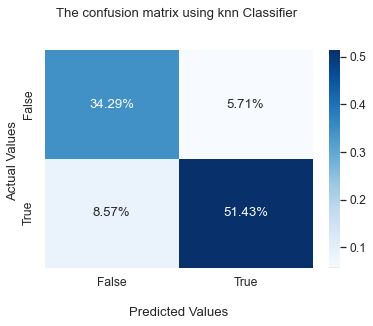

In [68]:
cmatrix_scratch(cm_implemented,"knn", "Blues")

## Without Scaling

In [69]:
y_pred_array=np.array(y_pred)

In [70]:
acc_scratch = calculate_accuracy(y_test, y_pred_array)
prec_scratch = calculate_precision(y_test, y_pred_array)
rec_scratch = calculate_recall(y_test, y_pred_array)
f1_scratch = calculate_f1_score(y_test, y_pred_array)

print(f'The Accuracy: {acc_scratch * 100:.4f}')
print(f'The Precision: {prec_scratch:.4f}')
print(f'The Recall: {rec_scratch:.4f}')
print(f'The F1 Score: {f1_scratch:.4f}')

The Accuracy: 88.5714
The Precision: 0.9048
The Recall: 0.9048
The F1 Score: 0.9048


In [71]:
###plot confusion matrix here
cm_implemented2= Implement_confusion_matrix(y_test, y_pred_array)
cm_implemented2

array([[12,  2],
       [ 2, 19]])

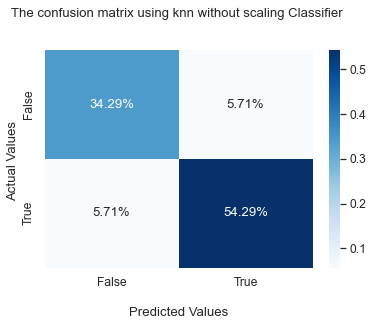

In [72]:
cmatrix_scratch(cm_implemented2,"knn without scaling", "Blues")

### KNN from SKlearn

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn_classifier.fit(x_train, y_train)

# Make predictions on the test set
Y_pred_knn_buildin = knn_classifier.predict(x_test)

In [74]:
Y_pred_knn_buildin

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [75]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [76]:
acc_buildin = calculate_accuracy(y_test, Y_pred_knn_buildin)
prec_buildin = calculate_precision(y_test, Y_pred_knn_buildin)
rec_buildin = calculate_recall(y_test, Y_pred_knn_buildin)
f1_buildin = calculate_f1_score(y_test, Y_pred_knn_buildin)

print(f'The Accuracy: {acc_buildin * 100:.4f}')
print(f'The Precision: {prec_buildin:.4f}')
print(f'The Recall: {rec_buildin:.4f}')
print(f'The F1 Score: {f1_buildin:.4f}')

The Accuracy: 82.8571
The Precision: 0.8571
The Recall: 0.8571
The F1 Score: 0.8571


In [77]:
###plot confusion matrix here
cm_implemented3= Implement_confusion_matrix(y_test, Y_pred_knn_buildin)
cm_implemented3


array([[11,  3],
       [ 3, 18]])

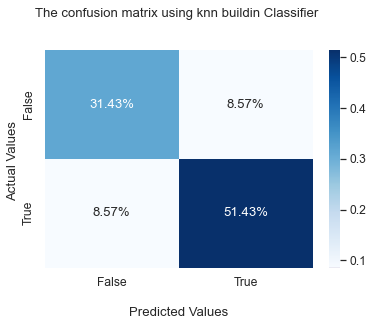

In [78]:
cmatrix_scratch(cm_implemented3,"knn buildin", "Blues")

### RNN from scratch

In [79]:
# Function to make predictions using the Radius Nearest Neighbors model
def predict_radius_nn_model(X_test, X_train, Y_train, r):
    # get the shape of x_test to form y_predict 
    Y_predict = []
    m_test, n_test = X_test.shape
    
    # Iterate through each test sample
    for i in range(m_test):
        x = X_test[i]
        
        # Find neighbors within the radius for the current test sample
        neighbors = find_neighbors(x, X_train, Y_train, r)
        
        # Use the mode (most common class) as the predicted class for the test sample
        Y_predict.append(mode(neighbors)[0][0])
    
    return Y_predict

# Function to find neighbors within a fixed radius r
def find_neighbors(x, X_train, Y_train, r):
    inside_radius = []
    length = len(X_train)
    
    # Iterate through each sample in the training set
    for i in range(length):
        # Calculate the Euclidean distance between the current test sample and the training sample
        distance = eucledian(x, X_train[i])
        
        # Check if the distance is within the specified radius
        if distance <= r:
            inside_radius.append(Y_train[i])
    
    # Convert the list of labels inside the radius to a NumPy array
    inside_region_array = np.array(inside_radius)
    return inside_region_array



In [80]:
r_values = range(3, 10)
for r in r_values:
    Y_pred = predict_radius_nn_model(x_test_sc, x_train_sc, y_train, r=r)
    acc = round(calculate_accuracy(y_test, y_pred)*100, 2)
    print(f"At r = {r}, the accuracy = {acc}")

At r = 3, the accuracy = 88.57
At r = 4, the accuracy = 88.57
At r = 5, the accuracy = 88.57
At r = 6, the accuracy = 88.57
At r = 7, the accuracy = 88.57
At r = 8, the accuracy = 88.57
At r = 9, the accuracy = 88.57


In [81]:
# Make predictions on the test set
Y_pred2 = predict_radius_nn_model(x_test_sc, x_train_sc, y_train, r=3)


In [82]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [83]:
y_pred2_array=np.array(Y_pred2)

acc_rnn_scratch = calculate_accuracy(y_test, y_pred2_array)
prec_rnn_scratch = calculate_precision(y_test, y_pred2_array)
rec_rnn_scratch = calculate_recall(y_test, y_pred2_array)
f1_rnn_scratch = calculate_f1_score(y_test, y_pred2_array)

print(f'The Accuracy: {acc_rnn_scratch * 100:.4f}')
print(f'The Precision: {prec_rnn_scratch:.4f}')
print(f'The Recall: {rec_rnn_scratch:.4f}')
print(f'The F1 Score: {f1_rnn_scratch:.4f}')

The Accuracy: 82.8571
The Precision: 0.8571
The Recall: 0.8571
The F1 Score: 0.8571


In [84]:
###plot confusion matrix here
cm_implemented4= Implement_confusion_matrix(y_test, y_pred2_array)
cm_implemented4


array([[11,  3],
       [ 3, 18]])

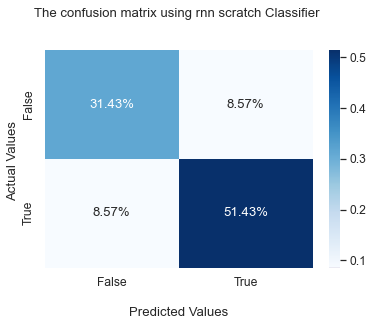

In [85]:
cmatrix_scratch(cm_implemented4,"rnn scratch", "Blues")

### SKlearn Radius neighbors classifiers

In [86]:
from sklearn.neighbors import RadiusNeighborsClassifier
radius_nn_classifier = RadiusNeighborsClassifier(radius=10)

# Train the model
radius_nn_classifier.fit(x_train_sc, y_train)

# Make predictions on the test set
Y_pred_rnn_buildin = radius_nn_classifier.predict(x_test_sc)

In [87]:
Y_pred_rnn_buildin_array=np.array(Y_pred_rnn_buildin)

acc_rnn_buildin = calculate_accuracy(y_test, Y_pred_rnn_buildin_array)
prec_rnn_buildin = calculate_precision(y_test, Y_pred_rnn_buildin_array)
rec_rnn_buildin = calculate_recall(y_test, Y_pred_rnn_buildin_array)
f1_rnn_buildin = calculate_f1_score(y_test, Y_pred_rnn_buildin_array)

print(f'The Accuracy: {acc_rnn_buildin * 100:.4f}')
print(f'The Precision: {prec_rnn_buildin:.4f}')
print(f'The Recall: {rec_rnn_buildin:.4f}')
print(f'The F1 Score: {f1_rnn_buildin:.4f}')

The Accuracy: 60.0000
The Precision: 0.6000
The Recall: 1.0000
The F1 Score: 0.7500


In [89]:
from sklearn.metrics import classification_report
rnn_report = classification_report(y_test, Y_pred_rnn_buildin)
print("The Classification report:\n", rnn_report)

The Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.60      1.00      0.75        21

    accuracy                           0.60        35
   macro avg       0.30      0.50      0.37        35
weighted avg       0.36      0.60      0.45        35



In [90]:
cm_implemented5= Implement_confusion_matrix(y_test, Y_pred_rnn_buildin_array)
cm_implemented5

array([[ 0, 14],
       [ 0, 21]])

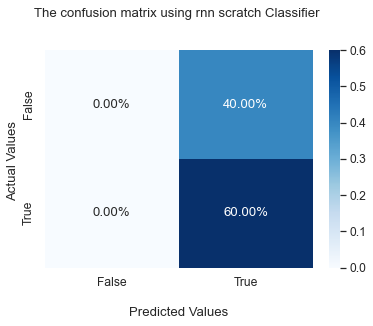

In [91]:
cmatrix_scratch(cm_implemented5,"rnn scratch", "Blues")

# Evaluation:

In [92]:
# scratch scalled vs buildin
knn_table_scalled = PrettyTable()
knn_table_scalled.field_names = ["Metric", "KNN scratch", "KNN SKlearn"]
# Add data to the table
knn_table_scalled.add_row(["Accuracy", acc_scalled_scratch, acc_buildin])
knn_table_scalled.add_row(["Precision", prec_scalled_scratch, prec_buildin])
knn_table_scalled.add_row(["Recall", rec_scalled_scratch, rec_buildin])
knn_table_scalled.add_row(["F1 score", f1_scalled_scratch, f1_buildin])


In [93]:
knn_table_scalled

Metric,KNN scratch,KNN SKlearn
Accuracy,0.8571428571428571,0.8285714285714286
Precision,0.9,0.8571428571428571
Recall,0.8571428571428571,0.8571428571428571
F1 score,0.8780487804878048,0.8571428571428571


In [94]:
# scratch  vs buildin
knn_table = PrettyTable()
knn_table.field_names = ["Metric", "KNN scratch", "KNN SKlearn"]
# Add data to the table
knn_table.add_row(["Accuracy", f1_scratch, acc_buildin])
knn_table.add_row(["Precision", prec_scratch, prec_buildin])
knn_table.add_row(["Recall", rec_scratch, rec_buildin])
knn_table.add_row(["F1 score", f1_scratch, f1_buildin])


In [95]:
knn_table

Metric,KNN scratch,KNN SKlearn
Accuracy,0.9047619047619048,0.8285714285714286
Precision,0.9047619047619048,0.8571428571428571
Recall,0.9047619047619048,0.8571428571428571
F1 score,0.9047619047619048,0.8571428571428571


In [96]:
rnn_table = PrettyTable()
rnn_table.field_names = ["Metric", "RNN scratch", "RNN SKlearn"]
# Add data to the table
rnn_table.add_row(["Accuracy", acc_rnn_scratch, acc_rnn_buildin])
rnn_table.add_row(["Precision", prec_rnn_scratch, prec_rnn_buildin])
rnn_table.add_row(["Recall", rec_rnn_scratch, rec_rnn_buildin])
rnn_table.add_row(["F1 score", f1_rnn_scratch, f1_rnn_buildin])

In [97]:
rnn_table

Metric,RNN scratch,RNN SKlearn
Accuracy,0.8285714285714286,0.6
Precision,0.8571428571428571,0.6
Recall,0.8571428571428571,1.0
F1 score,0.8571428571428571,0.7499999999999999
